In [337]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori
import pyfpgrowth
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

1. Read the dataset and perform data preprocessing on this dataset.<br>
Find and handle missing values <br>
Perform data transformation <br>
Perform data binning / discretisation

In [62]:
customer = pd.read_csv('customer.csv')

In [63]:
customer.head()

,id,name,income,age,gender,spending score,qty purchased,category,country,purchase type
0,1,A,NaN,-2,Male,95,1,books,new zealand,online
1,2,B,8086.0,27,Female,66,6,books,pakistan,offline
2,3,C,8676.0,7,Female,76,32,electronic,korea,online
3,4,D,5130.0,9,Male,33,19,furniture,south africa,offline
4,5,E,3704.0,41,Female,51,24,makeup,pakistan,online


#### Handling missing values

In [64]:
customer.isnull().sum()

id                0
name              0
income            4
age               0
gender            0
spending score    0
qty purchased     0
category          4
country           0
purchase type     3
dtype: int64

In [65]:
customer['income'].fillna(customer['income'].mean(), inplace = True)

In [66]:
customer['category'].fillna(customer['category'].mode()[0], inplace = True)

In [67]:
customer['purchase type'].fillna(customer['purchase type'].mode()[0], inplace = True)

In [68]:
customer.isnull().sum()

id                0
name              0
income            0
age               0
gender            0
spending score    0
qty purchased     0
category          0
country           0
purchase type     0
dtype: int64

#### Data Transformation 

##### Label encoding for gender, category, country, purchase type

In [69]:
encoder = preprocessing.LabelEncoder()

In [70]:
customer[['gender_encode', 'category_encode', 'country_encode', 'purchase type_encode']] = customer[['gender', 'category', 'country', 'purchase type']].apply(encoder.fit_transform)

In [71]:
customer.head()

,id,name,income,age,gender,spending score,qty purchased,category,country,purchase type,gender_encode,category_encode,country_encode,purchase type_encode
0,1,A,6279.454545,-2,Male,95,1,books,new zealand,online,1,1,8,1
1,2,B,8086.000000,27,Female,66,6,books,pakistan,offline,0,1,9,0
2,3,C,8676.000000,7,Female,76,32,electronic,korea,online,0,3,5,1
3,4,D,5130.000000,9,Male,33,19,furniture,south africa,offline,1,4,10,0
4,5,E,3704.000000,41,Female,51,24,makeup,pakistan,online,0,5,9,1


##### Scaling down spending score, quantity purchased, income to values between 0-1

In [72]:
scaler = preprocessing.MinMaxScaler()

In [73]:
customer[['spending score', 'qty purchased', 'income']] = scaler.fit_transform(customer[['spending score', 'qty purchased', 'income']])

In [74]:
customer.head()

,id,name,income,age,gender,spending score,qty purchased,category,country,purchase type,gender_encode,category_encode,country_encode,purchase type_encode
0,1,A,0.522288,-2,Male,0.969388,0.025,books,new zealand,online,1,1,8,1
1,2,B,0.771673,27,Female,0.673469,0.150,books,pakistan,offline,0,1,9,0
2,3,C,0.853120,7,Female,0.775510,0.800,electronic,korea,online,0,3,5,1
3,4,D,0.363611,9,Male,0.336735,0.475,furniture,south africa,offline,1,4,10,0
4,5,E,0.166759,41,Female,0.520408,0.600,makeup,pakistan,online,0,5,9,1


##### Data binning for age

In [75]:
min_age = customer['age'].min()
max_age = customer['age'].max()

In [76]:
customer['age groups'] = pd.cut(x = customer['age'], bins = [min_age, 12, 19, 28, 40, max_age], labels = ['child', 'teen','adult', 'middle aged', 'old'], include_lowest = True)

In [77]:
customer.head()

,id,name,income,age,gender,spending score,qty purchased,category,country,purchase type,gender_encode,category_encode,country_encode,purchase type_encode,age groups
0,1,A,0.522288,-2,Male,0.969388,0.025,books,new zealand,online,1,1,8,1,child
1,2,B,0.771673,27,Female,0.673469,0.150,books,pakistan,offline,0,1,9,0,adult
2,3,C,0.853120,7,Female,0.775510,0.800,electronic,korea,online,0,3,5,1,child
3,4,D,0.363611,9,Male,0.336735,0.475,furniture,south africa,offline,1,4,10,0,child
4,5,E,0.166759,41,Female,0.520408,0.600,makeup,pakistan,online,0,5,9,1,old


2. Visualize the data and datasets and identify anomalies and identify types of data preprocessing to be performed <br>
Box plot <br>
Scatter plot <br>
Histograms

##### Histogram

<AxesSubplot:xlabel='age', ylabel='Count'>

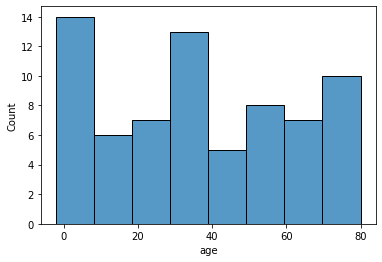

In [78]:
sns.histplot(customer['age'])

Removing age < 17 as people with age < 17 do not hae stable earning

In [79]:
customer.drop(customer[customer['age'] < 17].index, inplace = True)

<AxesSubplot:xlabel='age', ylabel='Count'>

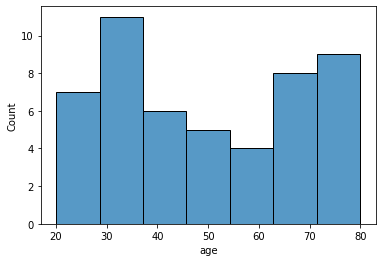

In [80]:
sns.histplot(customer['age'])

##### Boxplot

c:\users\kriti\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='qty purchased'>

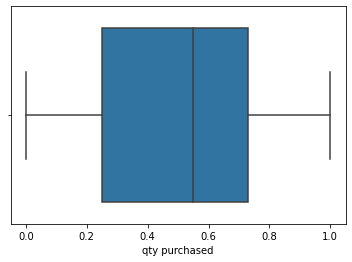

In [83]:
sns.boxplot(customer['qty purchased'])

##### Scatterplot

<AxesSubplot:xlabel='age', ylabel='category'>

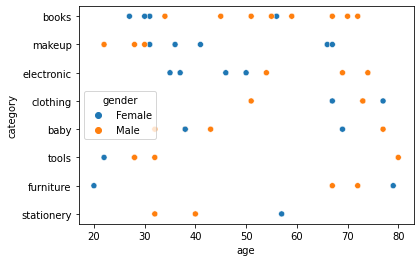

In [94]:
sns.scatterplot(data = customer, x = customer['age'], y = customer['category'], hue = customer['gender'])

3. Find useful patterns and associations using the Apriori approach.

In [126]:
market_basket = pd.read_csv('market_basket.csv')

In [128]:
market_basket.head()

,t_id,beer,coke,diaper,potato,tomato,onion,chilli
0,1,0,1,1,0,0,0,1
1,2,1,0,0,0,0,0,1
2,3,0,1,0,0,0,0,1
3,4,0,0,1,1,1,0,1
4,5,0,1,1,0,0,0,0


In [132]:
market_basket.drop(['t_id'], axis = 1, inplace = True)

List of lists of items

In [133]:
list_of_transactions = []

for i in range(len(market_basket)):
    transaction = []
    for j in range(len(market_basket.columns)):
        if market_basket.values[i][j] == 1:
            transaction.append(market_basket.columns[j])
    list_of_transactions.append(transaction)

In [135]:
for li in list_of_transactions:
    if len(li) == 0:
        list_of_transactions.remove(li)

In [164]:
list_of_transactions[:3]

[['coke', 'diaper', 'chilli'], ['beer', 'chilli'], ['coke', 'chilli']]

In [156]:
min_support = 0.4
min_confidence = 0.6

In [162]:
rules = list(apriori(transactions = list_of_transactions, min_sup = min_support, min_confidence = min_confidence))

In [165]:
rules[0]

RelationRecord(items=frozenset({'diaper', 'beer'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beer'}), items_add=frozenset({'diaper'}), confidence=0.6216216216216215, lift=1.1287339971550496), OrderedStatistic(items_base=frozenset({'diaper'}), items_add=frozenset({'beer'}), confidence=0.6052631578947368, lift=1.1287339971550496)])

In [182]:
for rule in rules:
    lhs = list(rule[2][0][0])[0]
    rhs = list(rule[2][0][1])[0]
    conf = rule[2][0][2]
    print(lhs, '->', rhs, ' confidence = ', conf)

beer -> diaper  confidence =  0.6216216216216215
tomato -> beer  confidence =  0.6451612903225806
tomato -> diaper  confidence =  0.6129032258064516
chilli -> diaper  confidence =  0.625
coke -> diaper  confidence =  0.6153846153846154
coke -> beer  confidence =  0.6363636363636365
coke -> tomato  confidence =  0.6923076923076923
diaper -> tomato  confidence =  0.6521739130434783
tomato -> beer  confidence =  0.6428571428571428
chilli -> diaper  confidence =  0.6
coke -> tomato  confidence =  0.6
onion -> diaper  confidence =  0.6666666666666667
coke -> tomato  confidence =  0.875


4. Find useful patterns and associations using the Frequent Pattern Tree Approach.

In [194]:
frequent_itemsets = pyfpgrowth.find_frequent_patterns(list_of_transactions, min_support)

In [195]:
rules = pyfpgrowth.generate_association_rules(frequent_itemsets, min_confidence)

In [204]:
rules

{('beer', 'chilli', 'coke', 'potato'): (('tomato',), 0.6666666666666666),
 ('beer', 'chilli', 'coke', 'tomato'): (('potato',), 1.0),
 ('beer', 'chilli', 'potato', 'tomato'): (('diaper',), 0.6666666666666666),
 ('chilli', 'coke', 'potato', 'tomato'): (('beer',), 1.0),
 ('beer', 'chilli', 'coke', 'diaper'): (('tomato',), 1.0),
 ('beer', 'chilli', 'coke', 'diaper', 'potato'): (('tomato',), 1.0),
 ('beer', 'chilli', 'coke', 'diaper', 'tomato'): (('potato',), 1.0),
 ('chilli', 'coke', 'diaper', 'potato', 'tomato'): (('beer',), 1.0),
 ('beer', 'coke', 'diaper', 'potato'): (('tomato',), 0.75),
 ('beer', 'coke', 'potato', 'tomato'): (('diaper',), 0.75),
 ('beer', 'diaper', 'potato', 'tomato'): (('coke',), 0.6),
 ('coke', 'diaper', 'potato', 'tomato'): (('beer',), 1.0),
 ('beer', 'chilli', 'coke'): (('potato',), 0.75),
 ('beer', 'coke', 'diaper'): (('tomato',), 0.875),
 ('beer', 'coke', 'tomato'): (('diaper',), 0.7777777777777778),
 ('coke', 'diaper', 'tomato'): (('beer',), 0.7777777777777778),

5. Model Classifiers, evaluate performance and visualize the results. ()

##### Splitting dataset

In [207]:
customer.head()

,id,name,income,age,gender,spending score,qty purchased,category,country,purchase type,gender_encode,category_encode,country_encode,purchase type_encode,age groups
1,2,B,0.771673,27,Female,0.673469,0.150,books,pakistan,offline,0,1,9,0,adult
4,5,E,0.166759,41,Female,0.520408,0.600,makeup,pakistan,online,0,5,9,1,old
7,8,H,0.131143,31,Female,0.520408,0.075,makeup,korea,online,0,5,5,1,middle aged
8,9,I,0.381695,35,Female,0.693878,0.600,electronic,australia,online,0,3,1,1,middle aged
10,11,K,0.614440,30,Male,0.775510,1.000,makeup,korea,online,1,5,5,1,middle aged


In [270]:
features = customer[['income','age','spending score','category_encode']]
target = customer['gender_encode']

In [271]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 0)

##### Naive Bayes

In [272]:
naivebayes = GaussianNB()
naivebayes.fit(x_train, y_train)
predicted_label = naivebayes.predict(x_test)
naivebayes.score(x_test, y_test)

0.4666666666666667

              precision    recall  f1-score   support

           0       0.22      0.67      0.33         3
           1       0.83      0.42      0.56        12

    accuracy                           0.47        15
   macro avg       0.53      0.54      0.44        15
weighted avg       0.71      0.47      0.51        15

[[2 1]
 [7 5]]
AUC ROC score 0.4722222222222222


[]

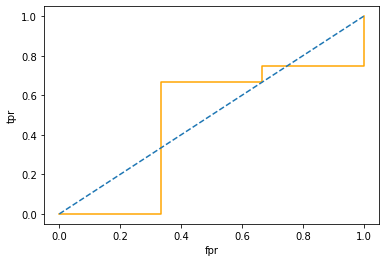

In [273]:
print(metrics.classification_report(y_test, predicted_label))
print(metrics.confusion_matrix(y_test, predicted_label))
probability = naivebayes.predict_proba(x_test)[:, 1]
print('AUC ROC score', metrics.roc_auc_score(y_test, probability))
fpr, tpr, threshold = metrics.roc_curve(y_test, probability)
plt.plot(fpr, tpr, color = 'orange')
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot()

##### Decision tree

In [274]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
predicted_label = dt.predict(x_test)
dt.score(x_test, y_test)

0.5333333333333333

              precision    recall  f1-score   support

           0       0.17      0.33      0.22         3
           1       0.78      0.58      0.67        12

    accuracy                           0.53        15
   macro avg       0.47      0.46      0.44        15
weighted avg       0.66      0.53      0.58        15

[[1 2]
 [5 7]]
0.45833333333333337


[]

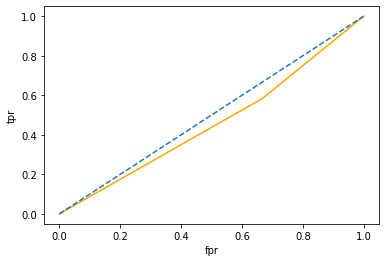

In [279]:
print(metrics.classification_report(y_test, predicted_label))
print(metrics.confusion_matrix(y_test, predicted_label))
probability = dt.predict_proba(x_test)[:, 1]
print(metrics.roc_auc_score(y_test, probability))
fpr, tpr, threshold = metrics.roc_curve(y_test, probability)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(fpr, tpr, color = 'orange')
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot()

6. Use Ensemble methods of classification to model a dataset, evaluate the performance and visualize the results.

##### Bagging Classifier

In [283]:
bag = BaggingClassifier()
bag.fit(x_train, y_train)
predicted_label = bag.predict(x_test)
bag.score(x_test, y_test)

0.6

              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.80      0.67      0.73        12

    accuracy                           0.60        15
   macro avg       0.50      0.50      0.49        15
weighted avg       0.68      0.60      0.63        15

[[1 2]
 [4 8]]
0.25


[]

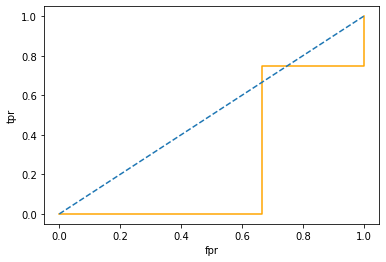

In [284]:
print(metrics.classification_report(y_test, predicted_label))
print(metrics.confusion_matrix(y_test, predicted_label))
probability = bag.predict_proba(x_test)[:, 1]
print(metrics.roc_auc_score(y_test, probability))
fpr, tpr, threshold = metrics.roc_curve(y_test, probability)
plt.plot(fpr, tpr, color = 'orange')
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot()

In [285]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
predicted_label = ada.predict(x_test)
ada.score(x_test, y_test)

0.3333333333333333

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.62      0.42      0.50        12

    accuracy                           0.33        15
   macro avg       0.31      0.21      0.25        15
weighted avg       0.50      0.33      0.40        15

[[0 3]
 [7 5]]
0.27777777777777785


Text(0, 0.5, 'tpr')

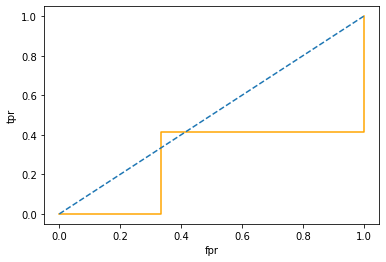

In [287]:
print(metrics.classification_report(y_test, predicted_label))
print(metrics.confusion_matrix(y_test, predicted_label))
probability = ada.predict_proba(x_test)[:, 1]
print(metrics.roc_auc_score(y_test, probability))
fpr, tpr, threshold = metrics.roc_curve(y_test, probability)
plt.plot(fpr, tpr, color = 'orange')
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot()
plt.xlabel('fpr')
plt.ylabel('tpr')

7. Group the data in a dataset based on similarity by using partitioning methods.<br>

##### kmeans 

Clustering based on age, gender, income into 3 clusters

In [288]:
customer.head()

,id,name,income,age,gender,spending score,qty purchased,category,country,purchase type,gender_encode,category_encode,country_encode,purchase type_encode,age groups
1,2,B,0.771673,27,Female,0.673469,0.150,books,pakistan,offline,0,1,9,0,adult
4,5,E,0.166759,41,Female,0.520408,0.600,makeup,pakistan,online,0,5,9,1,old
7,8,H,0.131143,31,Female,0.520408,0.075,makeup,korea,online,0,5,5,1,middle aged
8,9,I,0.381695,35,Female,0.693878,0.600,electronic,australia,online,0,3,1,1,middle aged
10,11,K,0.614440,30,Male,0.775510,1.000,makeup,korea,online,1,5,5,1,middle aged


In [293]:
dataset = customer[['age', 'gender_encode', 'income']]

In [298]:
dataset.head()

,age,gender_encode,income
1,27,0,0.771673
4,41,0,0.166759
7,31,0,0.131143
8,35,0,0.381695
10,30,1,0.614440


In [324]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
clusters = kmeans.fit_predict(dataset)

In [325]:
dataset['kmeans cluster'] = clusters

<ipython-input-325-adb01e3d1383>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['kmeans cluster'] = clusters


<AxesSubplot:xlabel='kmeans cluster', ylabel='income'>

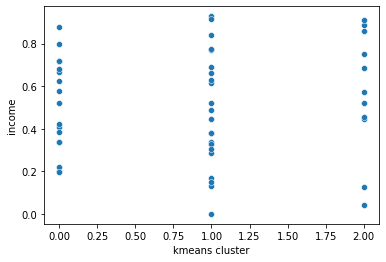

In [326]:
sns.scatterplot(data = dataset, x = dataset['kmeans cluster'], y = dataset['income'])

<AxesSubplot:xlabel='kmeans cluster', ylabel='age'>

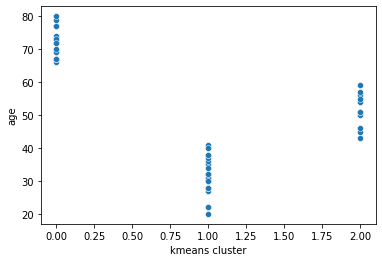

In [327]:
sns.scatterplot(data = dataset, x = dataset['kmeans cluster'], y = dataset['age'])

<AxesSubplot:xlabel='kmeans cluster', ylabel='gender'>

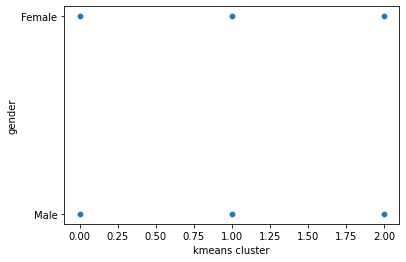

In [328]:
sns.scatterplot(data = dataset, x = dataset['kmeans cluster'], y = customer['gender'])

8. Group the data in a dataset based on similarity by using Density Based methods.

##### Agglomerative Clustering

In [335]:
agg = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean')
clusters = agg.fit_predict(dataset)
dataset['agglomerative cluster'] = clusters

<ipython-input-335-06727d9d9a46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['agglomerative cluster'] = clusters


In [336]:
dataset

,age,gender_encode,income,kmeans cluster,agglomerative cluster
1,27,0,0.771673,1,0
4,41,0,0.166759,1,0
7,31,0,0.131143,1,0
8,35,0,0.381695,1,0
10,30,1,0.614440,1,0
12,36,0,0.522288,1,0
13,37,0,0.660271,1,0
14,56,0,0.443678,2,2
17,73,1,0.717007,0,1
18,66,0,0.666207,0,1


<AxesSubplot:xlabel='agglomerative cluster', ylabel='age'>

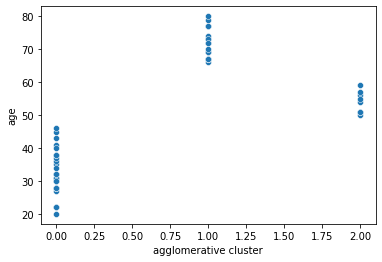

In [332]:
sns.scatterplot(data = dataset, x = dataset['agglomerative cluster'], y = dataset['age'])

<AxesSubplot:xlabel='agglomerative cluster', ylabel='income'>

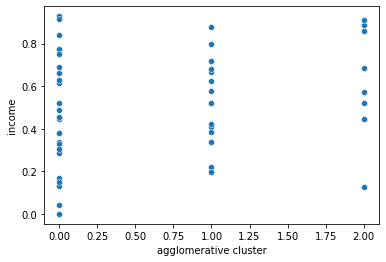

In [333]:
sns.scatterplot(data = dataset, x = dataset['agglomerative cluster'], y = dataset['income'])

<AxesSubplot:xlabel='agglomerative cluster', ylabel='gender_encode'>

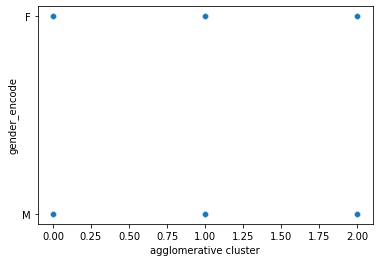

In [334]:
sns.scatterplot(data = dataset, x = dataset['agglomerative cluster'], y = dataset['gender_encode'].replace({0:'F', 1:'M'}))

##### DBSCAN Clustering

In [349]:
dbscan = DBSCAN(eps = 3, min_samples = 3)
clusters = dbscan.fit_predict(dataset)

In [351]:
dataset['dbscan cluster'] = clusters

<ipython-input-351-899e02fa60d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['dbscan cluster'] = clusters


<AxesSubplot:xlabel='dbscan cluster', ylabel='age'>

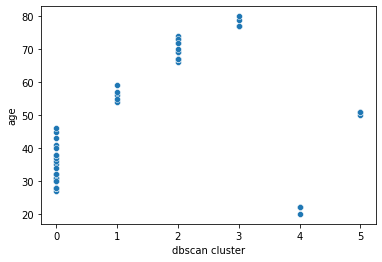

In [353]:
sns.scatterplot(data = dataset, x = dataset['dbscan cluster'], y = dataset['age'])

<AxesSubplot:xlabel='dbscan cluster', ylabel='income'>

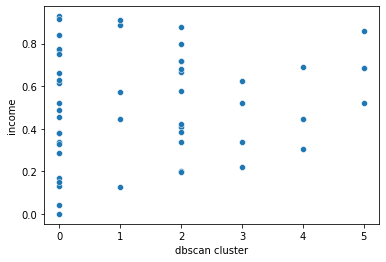

In [354]:
sns.scatterplot(data = dataset, x = dataset['dbscan cluster'], y = dataset['income'])

<AxesSubplot:xlabel='dbscan cluster', ylabel='gender_encode'>

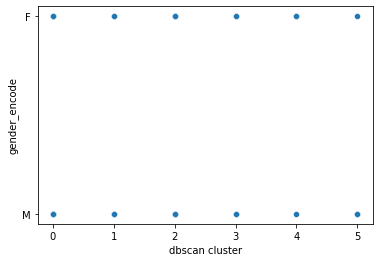

In [355]:
sns.scatterplot(data = dataset, x = dataset['dbscan cluster'], y = dataset['gender_encode'].replace({0:'F', 1:'M'}))